<a href="https://colab.research.google.com/github/chaitsugale/Cancer_Detection_CNN/blob/main/chaitanya_ugale_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN Assinment for Melanoma Detection

## Step 1 : Loading Package and Importing Files

In [1]:
# importing packages
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
#importing drive package
from google.colab import drive

In [3]:
#mounting content from google drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
#unzipping the file

#!unzip gdrive/MyDrive/CNN_assignment

!unzip gdrive/MyDrive/CNN_assignment -d '/content/gdrive/MyDrive/'

Archive:  gdrive/MyDrive/CNN_assignment.zip
replace /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg  
  inflating: /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010889.jpg  
  inflating: /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024468.jpg  
  inflating: /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024470.jpg  
  inflating: /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024511.jpg  
  inflating: /content/gdrive/MyDrive/Skin cancer ISIC The International Skin

In [5]:
# Defining the path for Train and Test

cancer_detection_train = pathlib.Path('/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train')

cancer_detection_test = pathlib.Path('/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [6]:
# checking the list

!ls

gdrive	sample_data


In [7]:
# checking the image count for train and test

image_count_train = len(list(cancer_detection_train.glob('*/*.jpg')))
image_count_test = len(list(cancer_detection_test.glob('*/*.jpg')))

# printing the count
print('No. of image in Train : ',image_count_train)
print('No. of image in Test : ',image_count_test)

No. of image in Train :  2239
No. of image in Test :  118


## Step 2 : Creating Dataset

In [8]:
# Defining some parameter for the loader

batch_size = 32
image_height = 180
image_width = 180

In [9]:
# writing train dataset for cancer detection

cancer_detection_train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    cancer_detection_train,
    seed = 123,
    validation_split = 0.3,
    subset = 'training',
    image_size=(image_height,image_width),
    batch_size=batch_size

)

Found 6739 files belonging to 9 classes.
Using 4718 files for training.


In [10]:
# writing validation dataset for cancer detection

cancer_detection_valid_ds = tf.keras.preprocessing.image_dataset_from_directory(
    cancer_detection_train,
    seed = 123,
    validation_split = 0.3,
    subset = 'validation',
    image_size=(image_height,image_width),
    batch_size=batch_size

)

Found 6739 files belonging to 9 classes.
Using 2021 files for validation.


In [11]:
# Listing out class of skin diseases

cancer_class = cancer_detection_train_ds.class_names

In [12]:
print(cancer_class)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


## Step 3: Dataset Visualization

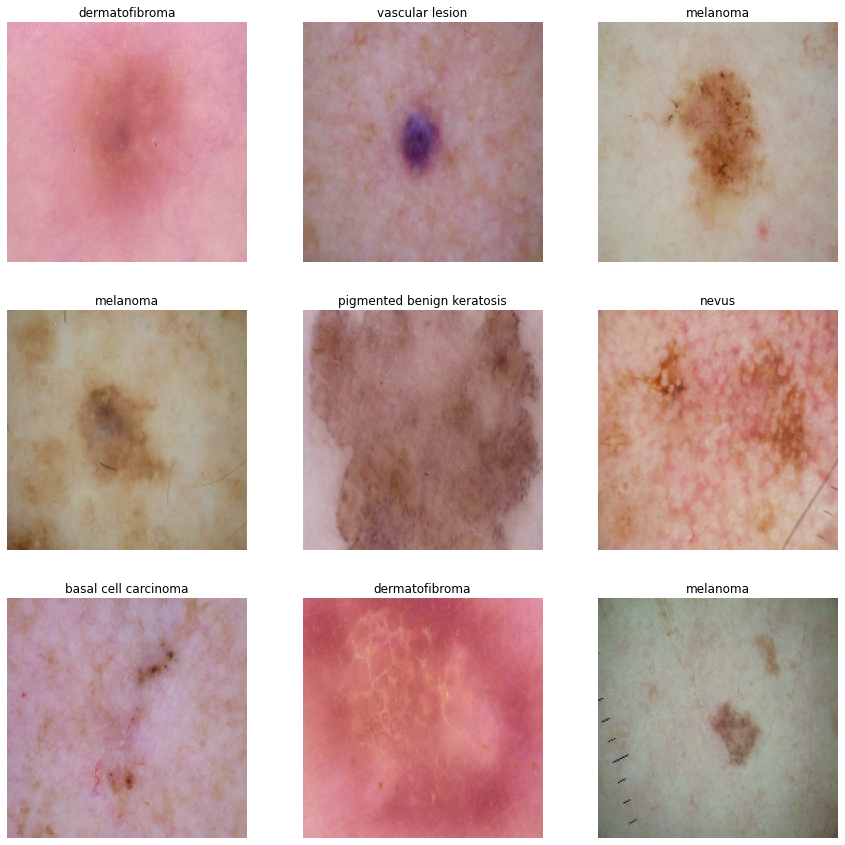

In [13]:
plt.figure(figsize=(15,15))

for cancer_image,cancer_labels in cancer_detection_train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(cancer_image[i].numpy().astype('uint8'))
    plt.title(cancer_class[cancer_labels[i]])
    plt.axis('off')


In [14]:
# Speeding Up Training Dataset to overlap data preprocessing and model execution while training

cancer_data_autotune = tf.data.experimental.AUTOTUNE

cancer_detection_train_ds = cancer_detection_train_ds.cache().shuffle(1000).prefetch(buffer_size=cancer_data_autotune)

cancer_detection_valid_ds = cancer_detection_valid_ds.cache().prefetch(buffer_size=cancer_data_autotune)



## Step 4 : Model Building and Training 

**Creating Model**

In [15]:
cancer_num_class = 9

cancer_model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255,input_shape=(image_height,image_width,3)),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(cancer_num_class)
]
)

In [16]:
#cancer_num_class = 9

#cancer_model = Sequential([
#  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(image_height, image_width, 3)),
#  layers.Conv2D(64, 3, padding='same', activation='relu'),
  #We slide over the feature map and extract tiles of a specified size. 
#  layers.MaxPooling2D(),
#  layers.Conv2D(128, 3, padding='same', activation='relu'),
  #We slide over the feature map and extract tiles of a specified size. 
#  layers.MaxPooling2D(),
#  layers.Conv2D(64, 3, padding='same', activation='relu'),
  #We slide over the feature map and extract tiles of a specified size. 
#  layers.MaxPooling2D(),
  #Advantages of downsampling - Decreased size of input for upcoming layers, Works against overfitting
  #layers.Flatten(),
  #Flattening - Convert into 1D feature vector.  Flattens all its structure to create a single long feature vector
  #layers.Dense(128, activation='relu'),
  #Dense Layer - A dense layer represents a matrix vector multiplication.  each input node is connected to each output node.
  #layers.Dense(cancer_num_class)
  #Dense Layer - A dense layer represents a matrix vector multiplication.  each input node is connected to each output node.
#])

**Compiling the model**

In [17]:
cancer_model.compile(optimizer='adam',
                     loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                     metrics=['accuracy'])

In [18]:
cancer_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

**Model Training**

In [ ]:
epochs = 20

cancer_history = cancer_model.fit(
    cancer_detection_train_ds,
    validation_data = cancer_detection_valid_ds,
    epochs = epochs
)

Epoch 1/20


**Visualizing Training Result**

In [ ]:
#Declaring Accuracy
cancer_accuracy = cancer_history.history['accuracy']

cancer_valid_accuracy = cancer_history.history['val_accuracy']

#Declaring Loss
cancer_loss = cancer_history.history['loss']

cancer_valid_loss = cancer_history.history['val_loss']

epochs_range = range(epochs)


In [ ]:
# Plotting Graph for Accuracy and Loss

#Graph for accuracy

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(epochs_range,cancer_accuracy,label='Cancer Training Accuracy')
plt.plot(epochs_range,cancer_valid_accuracy,label='Cancer Validation Accuracy')
plt.legend(loc='lower right')
plt.title("Cancer Training and Validation Accuracy")

#Graph for Loss

plt.subplot(1,2,2)
plt.plot(epochs_range,cancer_loss,label='Cancer Training Loss')
plt.plot(epochs_range,cancer_valid_loss,label='Cancer Validation Loss')
plt.legend(loc='lower right')
plt.title("Cancer Training and Validation Loss")

In [ ]:
cancer_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical", 
                                                 input_shape=(image_height, 
                                                              image_width,
                                                              3)),
    #layers.experimental.preprocessing.RandomRotation(0.6),
    layers.experimental.preprocessing.RandomZoom(height_factor=(-0.1, 0.1), width_factor=(-0.1, 0.1), fill_mode='constant'),
  ]
)

In [ ]:
cancer_image_batch = tf.cast(tf.expand_dims(cancer_image[0],0),tf.float32)

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = cancer_augmentation(cancer_image_batch)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0])
  plt.axis("off")

In [ ]:
plt.figure(figsize=(8,8))

for cancer_image,_ in cancer_detection_train_ds.take(1):
  for i in range(9):
    augmented_images = cancer_augmentation(cancer_image)
    ax = plt.subplot(3,3,i+1)
    plt.imshow(augmented_images[0].numpy().astype('uint8'))
    plt.axis('off')

In [ ]:
# creating the model using augmentation

cancer_num_class = 9

cancer_model = Sequential([
    cancer_augmentation,
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),  
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(cancer_num_class)         
])

In [ ]:
cancer_model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [ ]:
epochs = 20

cancer_history = cancer_model.fit(
    cancer_detection_train_ds,
    validation_data=cancer_detection_valid_ds,
    epochs = epochs
)

In [ ]:
#Declaring Accuracy
cancer_accuracy = cancer_history.history['accuracy']

cancer_valid_accuracy = cancer_history.history['val_accuracy']

#Declaring Loss
cancer_loss = cancer_history.history['loss']

cancer_valid_loss = cancer_history.history['val_loss']

epochs_range = range(epochs)

In [ ]:
# Plotting Graph for Accuracy and Loss

#Graph for accuracy

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(epochs_range,cancer_accuracy,label='Cancer Training Accuracy')
plt.plot(epochs_range,cancer_valid_accuracy,label='Cancer Validation Accuracy')
plt.legend(loc='lower right')
plt.title("Cancer Training and Validation Accuracy")

#Graph for Loss

plt.subplot(1,2,2)
plt.plot(epochs_range,cancer_loss,label='Cancer Training Loss')
plt.plot(epochs_range,cancer_valid_loss,label='Cancer Validation Loss')
plt.legend(loc='lower right')
plt.title("Cancer Training and Validation Loss")

In [ ]:
#cancer_train = os.path.join('/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train')
#cancer_valid = os.path.join('/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

cancer_train = os.path.join('/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train')

cancer_valid = os.path.join('/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Setting batch size and image size
batch_size = 100
IMG_SHAPE = 224 

# Create training images generator
#Generate batches of tensor image data with real-time data augmentation.
#https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    vertical_flip=True,
                    zoom_range=0.5
                    )
#https://keras.io/api/preprocessing/image/
#Then calling image_dataset_from_directory(main_directory, labels='inferred') will return a tf.data.Dataset that yields batches of images from the subdirectories
cancer_train_gen = image_gen_train.flow_from_directory(
                                                batch_size=batch_size,
                                                directory=cancer_train,
                                                shuffle=True,
                                                target_size=(IMG_SHAPE,IMG_SHAPE),
                                                class_mode='sparse'
                                                )

# Create validation images generator
image_gen_val = ImageDataGenerator(rescale=1./255)
cancer_val_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=cancer_valid,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='sparse')

In [ ]:
#Create a CNN model
#Experiment #1
#A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor
import numpy as np
import glob
import shutil
import matplotlib.pyplot as plt

# Import layers explicitly to keep our code compact
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D


model = Sequential()

#2D convolution layer (e.g. spatial convolution over images).
model.add(Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_SHAPE,IMG_SHAPE, 3)))
#Downsamples the input along its spatial dimensions (height and width) by taking the maximum value over an input window (of size defined by pool_size) for each channel of the input. 
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, 3, padding='same', activation='relu'))

#Downsamples the input along its spatial dimensions (height and width) by taking the maximum value over an input window (of size defined by pool_size) for each channel of the input. 
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#Flattens the input. Does not affect the batch size.
model.add(Flatten())

#https://keras.io/api/layers/regularization_layers/dropout/
#The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting. Inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over all inputs is unchanged
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))

model.add(Dropout(0.2))

#Just your regular densely-connected NN layer.
#Dense is the only actual network layer in that model. A Dense layer feeds all outputs from the previous layer to all its neurons, each neuron providing one output to the next layer.
#It's the most basic layer in neural networks. A Dense(10) has ten neurons. A Dense(512) has 512 neurons.
#Dense implements the operation: output = activation(dot(input, kernel)
model.add(Dense(9))

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
epochs = 20

history = model.fit(
  cancer_train_gen,
  validation_data=cancer_val_gen,
  epochs=20
)

In [ ]:
epochs=20

cancer_accuracy = history.history['accuracy']

cancer_valid_accuracy = history.history['val_accuracy']

#Declaring Loss
cancer_loss = history.history['loss']

cancer_valid_loss = history.history['val_loss']

epochs_range = range(epochs)

# Plotting Graph for Accuracy and Loss

#Graph for accuracy

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(epochs_range,cancer_accuracy,label='Cancer Training Accuracy')
plt.plot(epochs_range,cancer_valid_accuracy,label='Cancer Validation Accuracy')
plt.legend(loc='lower right')
plt.title("Cancer Training and Validation Accuracy")

#Graph for Loss

plt.subplot(1,2,2)
plt.plot(epochs_range,cancer_loss,label='Cancer Training Loss')
plt.plot(epochs_range,cancer_valid_loss,label='Cancer Validation Loss')
plt.legend(loc='lower right')
plt.title("Cancer Training and Validation Loss")

In [ ]:
from glob import glob

cancer_path = [x for x in glob(os.path.join(cancer_detection_train,'*','*.jpg'))]

cancer_lension = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(cancer_detection_train,'*','*.jpg'))]

len(cancer_path)

In [ ]:
cancer_dict =dict(zip(cancer_path,cancer_lension))

cancer_dataframe = pd.DataFrame(list(cancer_dict.items()),columns=['Path','Cancer Label'])

cancer_dataframe


In [ ]:
from sklearn.preprocessing import LabelEncoder

from collections import Counter

X,y = cancer_data['Path'],cancer_data['Cancer Label']

y = LabelEncoder().fit_transform(y)

counter = Counter(y)

for k,v in counter.items():
  per = v/len(y)*100
  print('Cancer Class = %d , count = %d , count percent = %.3f%%'%(k,v,per))

plt.bar(counter.keys(),counter.values())

plt.show()

In [ ]:
## Augmentor

In [ ]:
!pip install Augmentor

In [ ]:
#cancer_data_path = '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train'
#import Augmentor
#cancer_pipeline = Augmentor.Pipeline(cancer_data_path)
#cancer_pipeline.rotate(probability = 0.7,max_left_rotation=20,max_right_rotation=10)
#cancer_pipeline.zoom(probability = 0.3,min_factor=1.1,max_factor=1.5)
#cancer_pipeline.sample(500)
#cancer_pipeline.process()


In [ ]:
import Augmentor

for i in cancer_class:
    cancer_data_path = '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/'+i+'/'
    print(cancer_data_path)
    cancer_pipeline  = Augmentor.Pipeline(cancer_data_path)
    cancer_pipeline.rotate(probability=0.7, max_left_rotation=15, max_right_rotation=15)
    cancer_pipeline.sample(500)

In [ ]:
image_count_train = len(list(cancer_detection_train.glob('*/output/*.jpg')))
print(image_count_train)

In [ ]:
path_list_new = [x for x in glob(os.path.join(cancer_detection_train, '*','output', '*.jpg'))]
path_list_new

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(cancer_detection_train, '*','output', '*.jpg'))]
lesion_list_new

In [ ]:
cancer_new = dict(zip(path_list_new, lesion_list_new))

In [ ]:
df2 = pd.DataFrame(list(cancer_new.items()),columns = ['Path','Cancer Label'])
new_df = cancer_dataframe.append(df2)

In [ ]:
new_df['Cancer Label'].value_counts()

**Model Building & training on the rectified class imbalance data**

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
cancer_train_ds_new = tf.keras.preprocessing.image_dataset_from_directory(
    cancer_detection_train,
    seed = 123,
    validation_split = 0.3,
    subset = 'training',
    image_size=(image_height,image_width),
    batch_size=batch_size

)

In [ ]:
cancer_valid_ds_new = tf.keras.preprocessing.image_dataset_from_directory(
    cancer_detection_train,
    seed = 123,
    validation_split = 0.3,
    subset = 'validation',
    image_size=(image_height,image_width),
    batch_size=batch_size

)

In [ ]:
cancer_autotune_new = tf.data.experimental.AUTOTUNE

cancer_train_ds_new = cancer_train_ds_new.cache().shuffle(1000).prefetch(buffer_size=cancer_autotune_new)
cancer_valid_ds_new = cancer_valid_ds_new.cache().prefetch(buffer_size=cancer_autotune_new)

cancer_model_new = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(cancer_class)
])

In [ ]:
cancer_model_new .compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs = 30
cancer_history_new = cancer_model_new.fit(
  cancer_train_ds_new,
  validation_data=cancer_valid_ds_new,
  epochs=epochs
)

In [ ]:
cancer_accuracy = cancer_history_new.history['accuracy']
cancer_valid_accuracy = cancer_history_new.history['val_accuracy']

cancer_loss = cancer_history_new.history['loss']
cancer_valid_loss = cancer_history_new.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, cancer_accuracy, label='Training Accuracy')
plt.plot(epochs_range, cancer_valid_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, cancer_loss, label='Training Loss')
plt.plot(epochs_range, cancer_valid_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()